In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# unscaled, log-normalized counts, with conditions subsampled to the same number of cells 
# and 2000 highly variable genes calculated jointly across all perturbation conditions, including control, using scanpy28 with default parameters (Supplementary Methods)

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import os
import seaborn as sns
from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import multipletests
import string

In [4]:
p = "../evaluation_results/3_nlof/"
outlier_dfs = {f.split(".")[0]: pd.read_csv(os.path.join(p, f)).reset_index().rename({"level_0": "Test group"}, axis=1).drop(["index", "Unnamed: 0"], axis=1).sort_values("Test group") for f in os.listdir(p)}

In [6]:
outlier_dfs["sciplex_MCF7"]["Test group"].unique()

array([   10.,   100.,  1000., 10000.])

In [7]:
p_vals = list()
for i, dataset in enumerate(outlier_dfs):
    for j, test_group in enumerate(outlier_dfs[dataset]["Test group"].unique()):
        subset_true = outlier_dfs[dataset][(outlier_dfs[dataset]["Test group"] == test_group) & (outlier_dfs[dataset]["in matching"] == True)]["Negative outlier factor"]
        subset_false = outlier_dfs[dataset][(outlier_dfs[dataset]["Test group"] == test_group) & (outlier_dfs[dataset]["in matching"] == False)]["Negative outlier factor"]
        p_val = mannwhitneyu(subset_false, subset_true, alternative="less").pvalue
        p_vals.append(p_val)
        

In [4]:
p_vals = [np.float64(6.163970457385684e-210),
 np.float64(4.631374897090066e-218),
 np.float64(5.0419293020704277e-197),
 np.float64(1.135505961225095e-167),
 np.float64(0.0),
 np.float64(5.57295575183242e-295),
 np.float64(1.3059946941302752e-283),
 np.float64(1.8901852405672373e-183),
 np.float64(7.676427994632501e-301),
 np.float64(1.983149286403328e-176),
 np.float64(9.048780657117706e-211),
 np.float64(2.1950221626286154e-224)]

In [5]:
p_adjs = multipletests(p_vals, method="fdr_bh")[1]

In [14]:
outlier_dfs = {k: outlier_dfs[k].set_index("Test group") for k in outlier_dfs}
print(pd.DataFrame([p_vals, p_adjs], index=["$P$", "$P_{adj}$"], columns=pd.concat(outlier_dfs).index.unique()).to_latex())

In [10]:
datasets = outlier_dfs.keys()

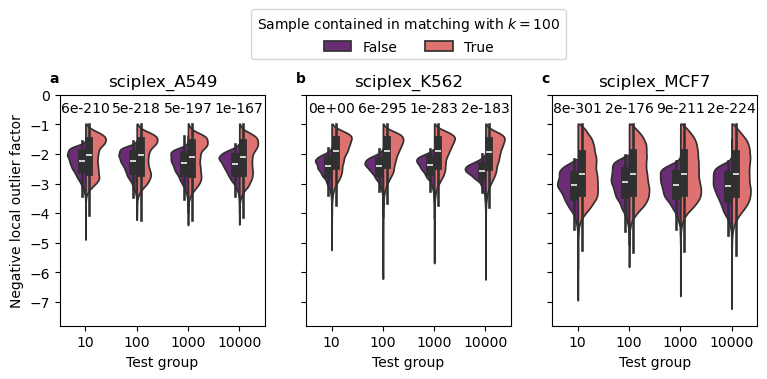

In [12]:
f, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
labels = string.ascii_lowercase  
j_steps = int(len(p_adjs) / len(outlier_dfs))

for i, dataset in enumerate(outlier_dfs):
    df = outlier_dfs[dataset]
    df["Test group"] = df["Test group"].astype(int)
    legend = False if i != 1 else "full"
    sns.violinplot(df, y="Negative outlier factor", hue="in matching", x="Test group", cut=0, split=True, palette="magma", ax=axs[i], legend=legend) 
    axs[i].set_title(dataset)
    axs[i].set_ylabel("Negative local outlier factor")

    axs[i].set_ylim(top=0, bottom=-7.8)

    for j in range(0, j_steps):
        axs[i].text(j, -0.7, f"{p_vals[(i * j_steps) + j]:.0e}", ha="center", va="bottom", fontsize=10, color="black")
    
    axs[i].text(
        -0.05, 1.1,  # Position (normalized figure coordinates)
        labels[i],   # Corresponding letter
        transform=axs[i].transAxes,  # Relative to subplot
        fontsize=10, fontweight='bold', va='top', ha='left'
    )

axs[1].legend(loc='upper center', bbox_to_anchor=(0.5, 1.4), ncol=2, title="Sample contained in matching with $k=100$")
plt.savefig("../plots/nof.pdf", bbox_inches="tight")

In [13]:
p_vals

[np.float64(6.163970457385684e-210),
 np.float64(4.631374897090066e-218),
 np.float64(5.0419293020704277e-197),
 np.float64(1.135505961225095e-167),
 np.float64(0.0),
 np.float64(5.57295575183242e-295),
 np.float64(1.3059946941302752e-283),
 np.float64(1.8901852405672373e-183),
 np.float64(7.676427994632501e-301),
 np.float64(1.983149286403328e-176),
 np.float64(9.048780657117706e-211),
 np.float64(2.1950221626286154e-224)]

In [15]:
f"{p_vals[j]:.2e}"

'1.14e-167'